# Life Expectancy (WHO)
Statistical Analysis on factors influencing Life Expectancy

# Project description:

## Data Set Information:

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset.

## Attribute Information:

#### The dataset consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:Immunization related factors, Mortality factors, Economical factors and Social factors.

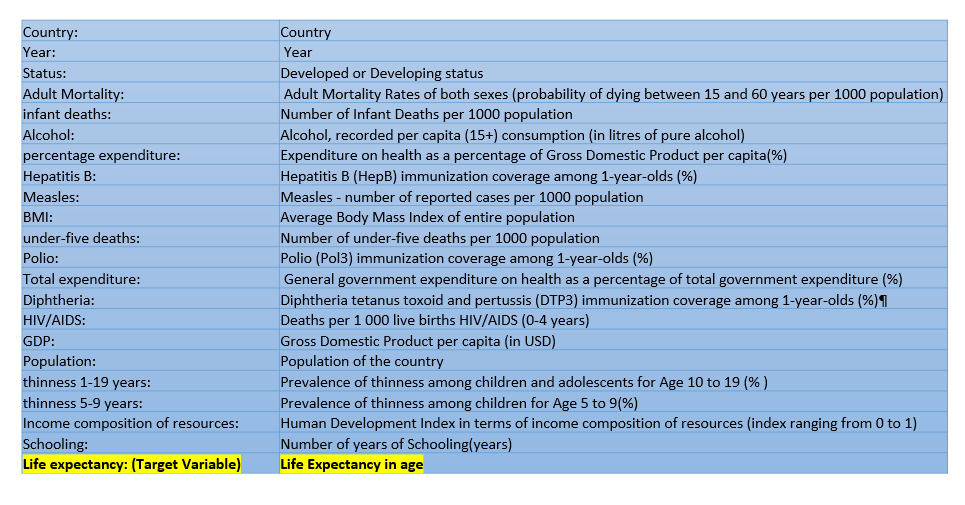

In [1]:
from IPython.display import Image
Image(filename='who_data_description.png')


## Datasource link

https://www.kaggle.com/kumarajarshi/life-expectancy-who

# Pre_Process_Data

## [A] Importing Basic Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pandas.plotting import scatter_matrix


from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

# command for work offline
py.offline.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(0) # for reproducibility

Using TensorFlow backend.


### dataframe to capture result of all models

In [3]:
evaluation = pd.DataFrame({'Model': [],
                           'Best parameters':[],
                           'Train score':[],
                           'Test score':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared ':[]})

##  [B] Reading the datasets

In [4]:
Who_df =pd.read_csv("WHO.csv")
print("Shape of WHO Data : ",Who_df.shape)

Shape of WHO Data :  (2938, 22)


## [C] Initial Overview of the Datasets

In [5]:
Who_df.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [6]:
Who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

## [D] Data transformation

### [1] Renaming some column names as they contain trailing spaces. 

In [7]:
Who_df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

### [2] Checking for percentage of Null Value in dataset 

Text(0.5, 1.0, 'Missing value in dataset(%)')

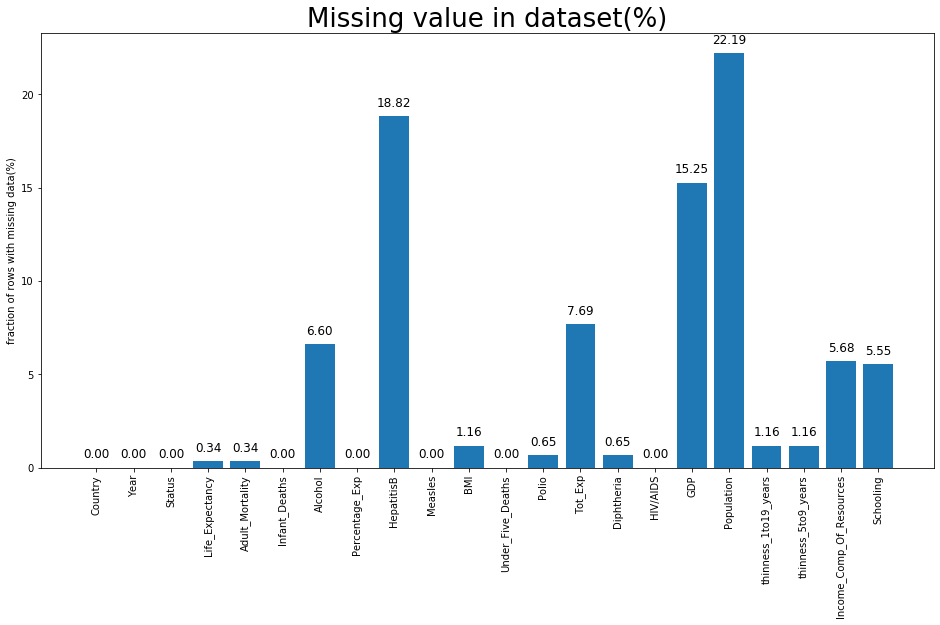

In [8]:
null_counts = Who_df.isnull().sum()*100/Who_df.isnull().count()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data(%)')
plt.bar(np.arange(len(null_counts)),null_counts)
for x,y in zip(np.arange(len(null_counts)),null_counts):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',size=12)
plt.title('Missing value in dataset(%)',size =26)    

### [3] Replacing all missing value with NaN

In [9]:
Who_df.replace(" ",np.NaN,inplace=True)

### [4] Replace NaN in each column with the respective column Median 

In [10]:
Who_df['Life_Expectancy'] = Who_df['Life_Expectancy'].transform(lambda x:x.fillna(x.median()))
Who_df['Adult_Mortality'] = Who_df['Adult_Mortality'].transform(lambda x:x.fillna(x.median()))
Who_df['Alcohol'] = Who_df['Alcohol'].transform(lambda x:x.fillna(x.median()))
Who_df['HepatitisB'] = Who_df['HepatitisB'].transform(lambda x:x.fillna(x.median()))
Who_df['BMI'] = Who_df['BMI'].transform(lambda x:x.fillna(x.median()))
Who_df['Polio'] = Who_df['Polio'].transform(lambda x:x.fillna(x.median()))
Who_df['Tot_Exp'] = Who_df['Tot_Exp'].transform(lambda x:x.fillna(x.median()))
Who_df['Diphtheria'] = Who_df['Diphtheria'].transform(lambda x:x.fillna(x.median()))
Who_df['GDP'] = Who_df['GDP'].transform(lambda x:x.fillna(x.median()))
Who_df['Population'] = Who_df['Population'].transform(lambda x:x.fillna(x.median()))
Who_df['thinness_1to19_years'] = Who_df['thinness_1to19_years'].transform(lambda x:x.fillna(x.median()))
Who_df['thinness_5to9_years'] = Who_df['thinness_5to9_years'].transform(lambda x:x.fillna(x.median()))
Who_df['Income_Comp_Of_Resources'] = Who_df['Income_Comp_Of_Resources'].transform(lambda x:x.fillna(x.median()))
Who_df['Schooling'] = Who_df['Schooling'].transform(lambda x:x.fillna(x.median()))


#### No columns have Null values in the data

In [11]:
Who_df.isnull().sum().values.sum()

0

### [5] Mapping  'Developing':0,'Developed':1 in Column 'Status' 

In [12]:
Who_df['Status']=Who_df['Status'].map({'Developing':0,'Developed':1})

### [7] dropping column country as it has 193 unique value

In [13]:
Who_df.drop(['Country'],axis=1,inplace=True)

### [8] Summary stats of dataset 

In [14]:
Who_df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Status,2938.0,1.742682e-01,3.794045e-01,0.00000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
Life_Expectancy,2938.0,6.923472e+01,9.509115e+00,36.30000,63.200000,7.210000e+01,7.560000e+01,8.900000e+01
Adult_Mortality,2938.0,1.647257e+02,1.240862e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
Infant_Deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.546875e+00,3.921946e+00,0.01000,1.092500,3.755000e+00,7.390000e+00,1.787000e+01
Percentage_Exp,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
HepatitisB,2938.0,8.302212e+01,2.299698e+01,1.00000,82.000000,9.200000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.838118e+01,1.993537e+01,1.00000,19.400000,4.350000e+01,5.610000e+01,8.730000e+01


#### Dropping few less important columns

In [16]:
Who_df_new =Who_df.drop(columns=['Under_Five_Deaths','thinness_5to9_years','Percentage_Exp'],axis =1)

### [9]Correlation of all the variables with respect to each other

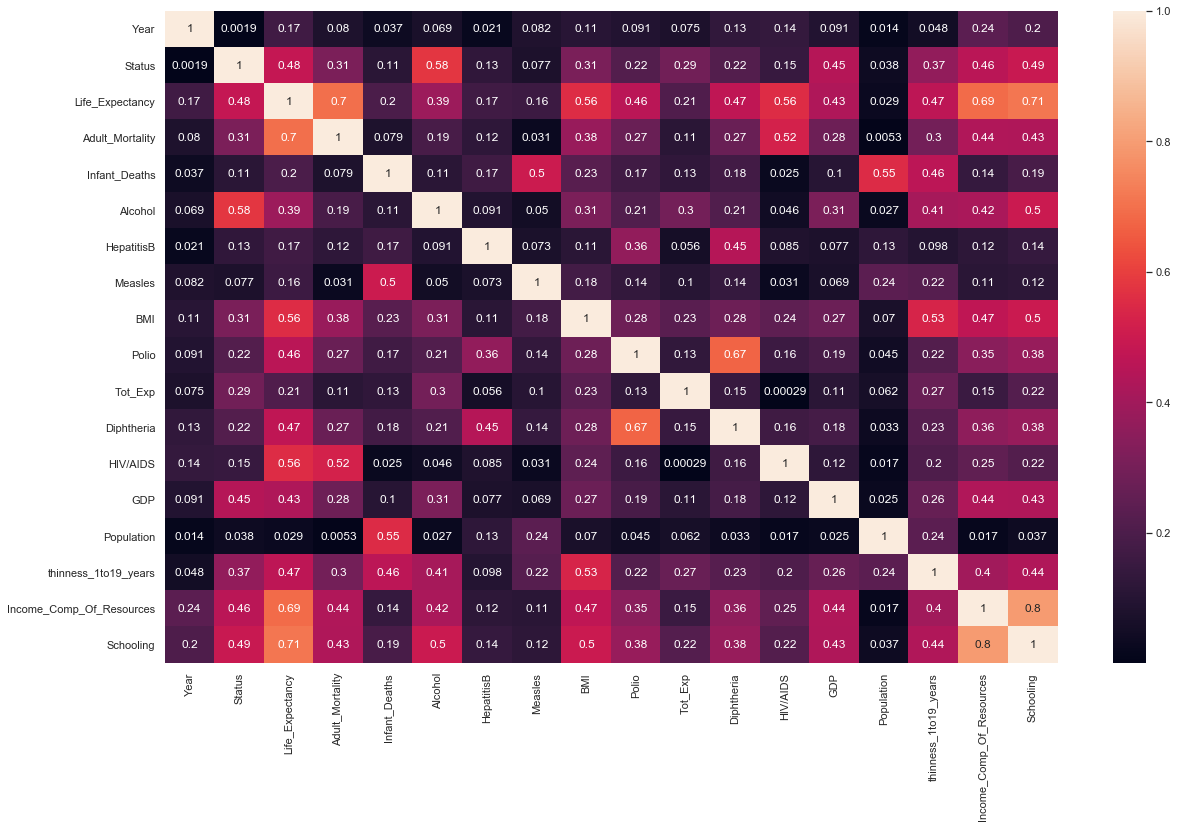

In [17]:
sns.set(rc={'figure.figsize':(20,12)})
sns.heatmap(Who_df_new.corr().abs(),annot=True)

In [18]:
Who_df_new.shape

(2938, 18)

## [E] Regression Tasks

### Evaluation Metrics for Regression

For Regression tasks, the best model is evaluated on the basis of r2 Square score followed by least Root Mean Squared error (RMSE) followed by Train and Test Scores.

r2 square is given by r2_score(y_test,pred)

### Making train test split

In [19]:
#making target variable as 'Life_Expectancy'

X = Who_df_new.drop(['Life_Expectancy'],axis =1)

y = Who_df_new['Life_Expectancy']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

## [10] Scatter plot for dataset feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238AC6FAF60>,
      dtype=object)

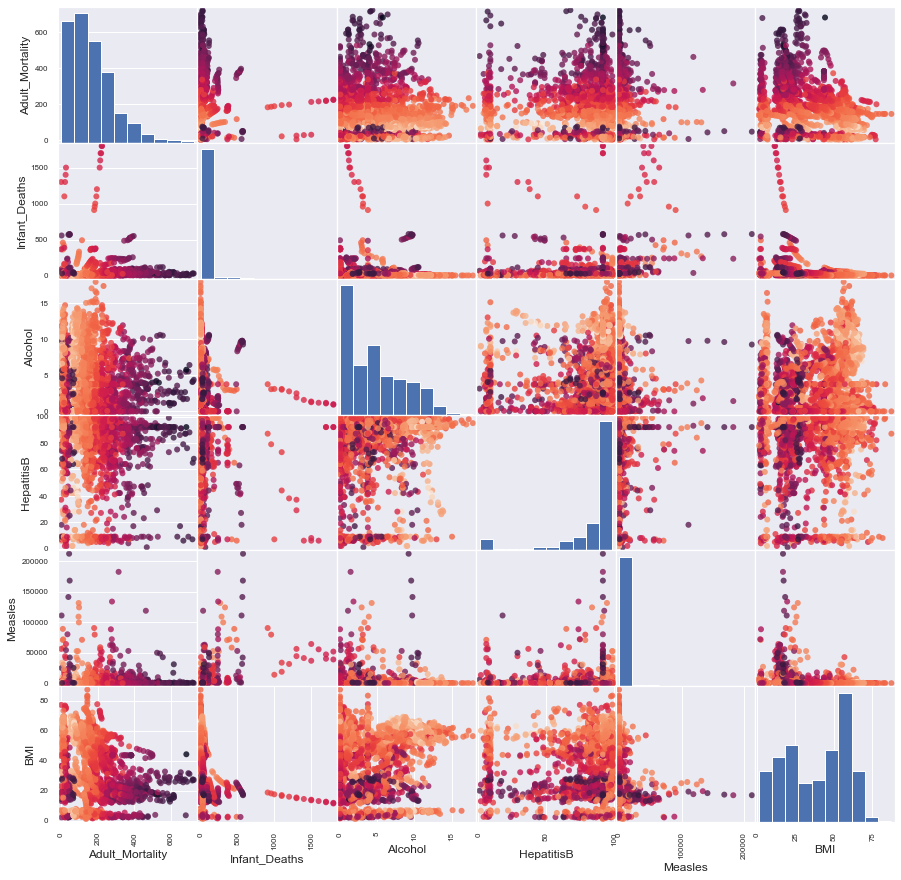

In [21]:
from pandas.plotting import scatter_matrix

attr = X.columns[2:8]
scatter_matrix(X[attr], figsize= (15, 15), c = y, alpha = 0.8, marker= 'o')

### Scaling

###  MinMax Scaling

In [22]:
## Splitting data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape:  (2056, 17)
y_train shape:  (2056,)
X_test shape:  (882, 17)
y_test shape (882,)


#### We have used MinMaxScaler  which essentially shrinks the range such that the range is now between 0 and 1 or (-1 to 1 if there are neagative values)

# Data_Modelling

# Project 2

## [A]  Apply any two models with bagging and any two models with pasting.

### From our project 1, on the basis of r2 square score we have chosen following models to apply ensemling method:
### Kenelized SVM and Decison tree 

## 1st Model (Decision Tree) with bagging and pasting

### [1] Decision Tree with Bagging

In [22]:
dt_reg = DecisionTreeRegressor(random_state=0,max_depth=9,min_samples_leaf=6)
bag_dt_reg = BaggingRegressor(dt_reg, bootstrap= True, random_state = 0,oob_score=True)
bag_dt_reg.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=9,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=6,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=0,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0,

### Apply grid search on bagging to find best parameter 

In [23]:
grid_param ={'max_samples' :[200,500,1000],
             'max_features':[5, 7, 9],
             'n_estimators' :[10,50,100, 200, 500,1000,]
            }
dt_grid =GridSearchCV(bag_dt_reg,grid_param, cv=5)
dt_grid.fit(X_train,y_train)
best_parameters_Dt_bag=dt_grid.best_params_

In [116]:
print("GridSearchCV best parameter :",dt_grid.best_params_)

TRS_bag_dt=round(dt_grid.score(X_train,y_train),4)
TS_dt_bag =round (dt_grid.score(X_test,y_test),4)
print("Train bagging score for DT : {:.4f}".format(dt_grid.score(X_train,y_train)))
print("Test bagging score for DT : {:.4f}".format(dt_grid.score(X_test,y_test)))
y_pred_dt_bag =dt_grid.predict(X_test)

RMSE_dt_bag = round(np.sqrt(mean_squared_error(y_test,y_pred_dt_bag)),4)
r2_dt_bag= round(r2_score(y_test,y_pred_dt_bag),4)
print('r2_score for DT boosting:',r2_dt_bag)


r = evaluation.shape[0]
evaluation.loc[r] = ['Bagging DecisionTree Regression',best_parameters_Dt_bag,TRS_bag_dt,TS_dt_bag,RMSE_dt_bag,r2_dt_bag]
evaluation


GridSearchCV best parameter : {'max_features': 9, 'max_samples': 1000, 'n_estimators': 50}
Train bagging score for DT : 0.9627
Test bagging score for DT : 0.9423
r2_score for DT boosting: 0.9423


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423


###  [2] Decision Tree with Pasting (using the best parameter)

#### For pasting change argument to bootstrap= False

In [25]:
dt_reg = DecisionTreeRegressor(random_state=0,max_depth=9,min_samples_leaf=6)
Pas_dt_reg = BaggingRegressor(dt_reg, n_estimators=50, bootstrap= False, max_features=9, random_state = 0,max_samples=1000)
Pas_dt_reg.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=9,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=6,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=0,
                                                      splitter='best'),
                 bootstrap=False, bootstrap_features=False, max_features=9,
                 max_samples=1000,

In [117]:
TRS_dt_pas = round(Pas_dt_reg.score(X_train,y_train),4)
TS_dt_pas =round(Pas_dt_reg.score(X_test,y_test),4)
print("Train pasting score for DT : {:.4f}".format(Pas_dt_reg.score(X_train,y_train)))
print("Test bagging score for DT : {:.4f}".format(Pas_dt_reg.score(X_test,y_test)))

y_pred_dt_pas =Pas_dt_reg.predict(X_test)

RMSE_dt_pas= round(np.sqrt(mean_squared_error(y_test,y_pred_dt_pas)),4)
r2_dt_pas= round(r2_score(y_test,y_pred_dt_pas),4)
print('r2_score for DT pasting: ',r2_dt_pas)

r = evaluation.shape[0]
evaluation.loc[r] = ['Pasting DecisionTree Regression',best_parameters_Dt_bag,TRS_dt_pas,TS_dt_pas,RMSE_dt_pas,r2_dt_pas]
evaluation

Train pasting score for DT : 0.9693
Test bagging score for DT : 0.9455
r2_score for DT pasting:  0.9455


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455


## 2nd Model (Kernelized SVM) with bagging and pasting

#### For pasting change argument to bootstrap= False

### ` [1] Kernelized SVR with bagging

In [27]:
kernelized_svr = SVR(C=100,gamma=1,kernel ='rbf')
bag_kSVR_reg = BaggingRegressor(kernelized_svr,random_state = 0,bootstrap= True,oob_score =True)
bag_kSVR_reg.fit(X_train,y_train)

BaggingRegressor(base_estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3,
                                    epsilon=0.1, gamma=1, kernel='rbf',
                                    max_iter=-1, shrinking=True, tol=0.001,
                                    verbose=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=True,
                 random_state=0, verbose=0, warm_start=False)

In [28]:
grid_param_KSVM ={'max_samples' :[500,1000],
                'max_features':[5,10],
                'n_estimators' :[500,1000]
                }

KSVM_grid =GridSearchCV(bag_kSVR_reg,grid_param_KSVM, cv=5)
KSVM_grid.fit(X_train,y_train)
best_parameters_KSVM_bag = KSVM_grid.best_params_
print("bagging best parameter",KSVM_grid.best_params_)

bagging best parameter {'max_features': 10, 'max_samples': 1000, 'n_estimators': 500}


In [118]:

TRS_KSVM_bag =round(KSVM_grid.score(X_train,y_train),4)
TS_KSVM_bag =round(KSVM_grid.score(X_test,y_test),4)

print("Train Boosting score for Kernelized SVR : {:.4f}".format(KSVM_grid.score(X_train,y_train)))
print("Test Boosting score for Kernelized SVR: {:.4f}".format(KSVM_grid.score(X_test,y_test)))

y_pred_KSVM_bag =KSVM_grid.predict(X_test)

RMSE_KSVM_bag = round(np.sqrt(mean_squared_error(y_test,y_pred_KSVM_bag)),4)
r2_KSVM_bag = round(r2_score(y_test,y_pred_KSVM_bag),4)
print('r2_score for Kernelized SVM bagging: ',r2_KSVM_bag)

r = evaluation.shape[0]
evaluation.loc[r] = ['Bagging Kernelized SVR',best_parameters_KSVM_bag,TRS_KSVM_bag,TS_KSVM_bag,RMSE_KSVM_bag,r2_KSVM_bag]
evaluation

Train Boosting score for Kernelized SVR : 0.9205
Test Boosting score for Kernelized SVR: 0.9073
r2_score for Kernelized SVM bagging:  0.9073


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073


### [2] Kernelized SVR with Pasting(using best parameter)

In [30]:
kernelized_svr = SVR(C=100,gamma=1,kernel ='rbf')
pas_kSVR_reg = BaggingRegressor(kernelized_svr, n_estimators=500, bootstrap= False, max_features=10, random_state = 0,max_samples=1000)
pas_kSVR_reg.fit(X_train,y_train)


BaggingRegressor(base_estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3,
                                    epsilon=0.1, gamma=1, kernel='rbf',
                                    max_iter=-1, shrinking=True, tol=0.001,
                                    verbose=False),
                 bootstrap=False, bootstrap_features=False, max_features=10,
                 max_samples=1000, n_estimators=500, n_jobs=None,
                 oob_score=False, random_state=0, verbose=0, warm_start=False)

In [119]:
TRS_KSVM_pas =round(pas_kSVR_reg.score(X_train,y_train),4)
TS_KSVM_pas =round(pas_kSVR_reg.score(X_test,y_test),4)
print("Train pasting score for Kernelized SVR : {:.4f}".format(pas_kSVR_reg.score(X_train,y_train)))
print("Test pasting score for Kernelized SVR: {:.4f}".format(pas_kSVR_reg.score(X_test,y_test)))

y_pred_KSVM_pas =pas_kSVR_reg.predict(X_test)
RMSE_KSVM_pas = round(np.sqrt(mean_squared_error(y_test,y_pred_KSVM_pas)),4)
r2_KSVM_pas = round(r2_score(y_test,y_pred_KSVM_pas),4)

print('r2_score for Kernelized SVM for pasting:',r2_KSVM_pas)

r = evaluation.shape[0]
evaluation.loc[r] = ['Pasting Kernelized SVR',best_parameters_KSVM_bag,TRS_KSVM_pas,TS_KSVM_pas,RMSE_KSVM_pas,r2_KSVM_pas]
evaluation

Train pasting score for Kernelized SVR : 0.9211
Test pasting score for Kernelized SVR: 0.9074
r2_score for Kernelized SVM for pasting: 0.9074


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074


## [B]  Apply any two models with adaboost boosting

### [1] Decision tree with adaboost boosting

#### Using ADAboost grid score best parameter for  Decison Tree

In [32]:
ada_reg_dt = AdaBoostRegressor(dt_reg,random_state=0)
param_grid_ada_reg_dt = {
            'n_estimators':[500,1000],
             'learning_rate':[0.1, 0.5, 1]
            }
ada_grid_dt = GridSearchCV(ada_reg_dt,param_grid_ada_reg_dt,cv=5 )
ada_grid_dt.fit(X_train,y_train)
best_parameters_dt_ada= ada_grid_dt.best_params_
print("Best parameter",ada_grid_dt.best_params_)

Best parameter {'learning_rate': 0.1, 'n_estimators': 1000}


In [120]:
TRS_dt_ada =round(ada_grid_dt.score(X_train,y_train),4)
TS_dt_ada =round(ada_grid_dt.score(X_test,y_test),4)
print("Train score for DT regressor: {:.4f}".format(ada_grid_dt.score(X_train,y_train)))
print("Test  score for DT regressor: {:.4f}".format(ada_grid_dt.score(X_test,y_test)))
y_pred_dt_ada = ada_grid_dt.predict(X_test)

RMSE_dt_ada = round(np.sqrt(mean_squared_error(y_test,y_pred_dt_ada)),4)
r2_dt_ada = round(r2_score(y_test,y_pred_dt_ada),4)
print('r2_score for DT for adaboosting: ',r2_dt_ada)

r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBossting DecisionTre regression',best_parameters_dt_ada,TRS_dt_ada,TS_dt_ada,RMSE_dt_ada,r2_dt_ada]
evaluation

Train score for DT regressor: 0.9916
Test  score for DT regressor: 0.9573
r2_score for DT for adaboosting:  0.9573


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573


### [2] KSVM with Ada boosting

In [35]:
ada_reg_KSVM = AdaBoostRegressor(kernelized_svr,random_state=0)
param_grid_ada_reg_KSVM = {
            'n_estimators':[1000],
             'learning_rate':[0.1]
            }
ada_grid_KSVM = GridSearchCV(ada_reg_KSVM,param_grid_ada_reg_KSVM ,cv=5)
ada_grid_KSVM.fit(X_train,y_train)
best_parameters_KSVM_ada= ada_grid_KSVM.best_params_
print("Best parameter",ada_grid_KSVM.best_params_)

Best parameter {'learning_rate': 0.1, 'n_estimators': 1000}


In [121]:
TRS_KSVM_ada = round(ada_grid_KSVM.score(X_train,y_train),4)
TS_KSVM_ada =round(ada_grid_KSVM.score(X_test,y_test),4)
print("Train score for KSVM regressor: {:.4f}".format(ada_grid_KSVM.score(X_train,y_train)))
print("Test  score for KSVM regressor: {:.4f}".format(ada_grid_KSVM.score(X_test,y_test)))

y_pred_KSVM_ada = ada_grid_KSVM.predict(X_test)
RMSE_KSVM_ada= round(np.sqrt(mean_squared_error(y_test,y_pred_KSVM_ada)),4)

r2_KSVM_ada = round(r2_score(y_test,y_pred_KSVM_ada),4)
print('r2_score for KSVM for adaboosting: ',r2_KSVM_ada)

r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBossting KSVM regression',best_parameters_KSVM_ada,TRS_KSVM_ada,TS_KSVM_ada,RMSE_KSVM_ada,r2_KSVM_ada]
evaluation


Train score for KSVM regressor: 0.9702
Test  score for KSVM regressor: 0.9047
r2_score for KSVM for adaboosting:  0.9047


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047


# Gradient boosting:

In [37]:
gd_reg = GradientBoostingRegressor(random_state=0)
param_grid_gb = {
            'n_estimators':[100,500,1000],
             'learning_rate':[0.1, 0.5, 1],
              'max_depth':range(1,10)
            }

grid_gb_reg=GridSearchCV(gd_reg,param_grid_gb,cv=5)
grid_gb_reg.fit(X_train,y_train)

best_parameters_gb = grid_gb_reg.best_params_
print(" GB best parameter: ",grid_gb_reg.best_params_)

 GB best parameter:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}


In [122]:
TRS_gb = round(grid_gb_reg.score(X_train,y_train),4)
TS_gb =round(grid_gb_reg.score(X_test,y_test),4)
print("Train score for GB regressor: {:.4f}".format(grid_gb_reg.score(X_train,y_train)))
print("Test  score for GB regressor: {:.4f}".format(grid_gb_reg.score(X_test,y_test)))
y_pred_GB = grid_gb_reg.predict(X_test)

RMSE_gb= round(np.sqrt(mean_squared_error(y_test,y_pred_GB)),4)
r2_GB =round(r2_score(y_test,y_pred_GB),4)
print('r2_score for Gradient Boosting: ',r2_GB)

r = evaluation.shape[0]
evaluation.loc[r] = ['GradientBoosting regression',best_parameters_gb,TRS_gb,TS_gb,RMSE_gb,r2_GB]
evaluation

Train score for GB regressor: 1.0000
Test  score for GB regressor: 0.9606
r2_score for Gradient Boosting:  0.9606


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.0000,0.9606,1.8741,0.9606


## Random Forest

In [40]:
rnd_reg = RandomForestRegressor(random_state = 0)
param_grid_rf = {
            'n_estimators':[100,500,1000],
              'max_depth':range(1,10)
            }

grid_rf_reg=GridSearchCV(rnd_reg,param_grid_rf,cv=5)
grid_rf_reg.fit(X_train,y_train)
best_parameters_rf =grid_rf_reg.best_params_
print(" Best parameter:",grid_rf_reg.best_params_)

 Best parameter: {'max_depth': 9, 'n_estimators': 1000}


In [123]:
TRS_rf =round(grid_rf_reg.score(X_train,y_train),4)
TS_rf =round(grid_rf_reg.score(X_test,y_test),4)

print("Train score for RF regressor: {:.4f}".format(grid_rf_reg.score(X_train,y_train)))
print("Test  score for RF regressor: {:.4f}".format(grid_rf_reg.score(X_test,y_test)))
y_pred_RF = grid_rf_reg.predict(X_test)

RMSE_rf= round(np.sqrt(mean_squared_error(y_test,y_pred_RF)),4)
r2_rf= round(r2_score(y_test,y_pred_RF),4)
print('r2_score for Random Forest: ',r2_rf)

r = evaluation.shape[0]
evaluation.loc[r] = ['RanomForest regression',best_parameters_rf,TRS_rf,TS_rf,RMSE_rf,r2_rf]
evaluation

Train score for RF regressor: 0.9864
Test  score for RF regressor: 0.9511
r2_score for Random Forest:  0.9511


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.0000,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511


In [25]:
rnd_reg1 = RandomForestRegressor(n_estimators= 1000, max_depth= 9, random_state = 0)
rnd_reg1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

### Feature selection using random Random Forest

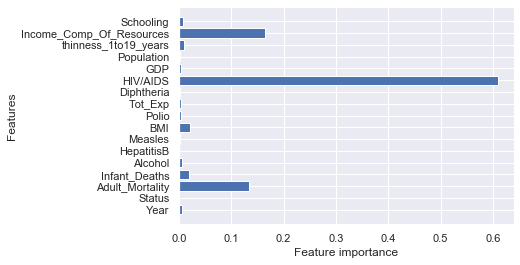

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def plot_feature_importance_LifeExcpectancy(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    
plot_feature_importance_LifeExcpectancy(rnd_reg1)

## PCA

In [26]:
pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

Text(0, 0.5, 'cumulative explianed variance')

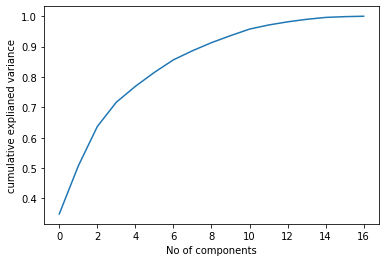

In [27]:
pca =PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
plt.ylabel("cumulative explianed variance")

In [28]:
X_train.shape

(2056, 17)

In [29]:
X_train_reduced.shape

(2056, 11)

features have been reduced from 17 to 11

### [1] Linear Regression

In [124]:
lreg =LinearRegression()
lreg.fit(X_train_reduced, y_train)
y_pred_linear_pca=lreg.predict(X_test_reduced)

TRS_linear_pca =round(lreg.score(X_train_reduced, y_train),4)
TS_linear_pca =round(lreg.score(X_test_reduced, y_test),4)
print('Train score: {:.4f} '.format(lreg.score(X_train_reduced, y_train)))
print('Test score: {:.4f} '.format(lreg.score(X_test_reduced, y_test)))

RMSE_Linear_pca= round(np.sqrt(mean_squared_error(y_test,y_pred_linear_pca)),4)
print('RMSE: ',RMSE_Linear_pca)

r2_Linear_pca= round(r2_score(y_test,y_pred_linear_pca),4)
print('r2_score: ',r2_Linear_pca)

r = evaluation.shape[0]
evaluation.loc[r] = ['Pca Linear regression','-',TRS_linear_pca,TS_linear_pca,RMSE_Linear_pca,r2_Linear_pca]
evaluation

Train score: 0.7866 
Test score: 0.7816 
RMSE:  4.4149
r2_score:  0.7816


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.0000,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816


## [2] KNN Regression

In [125]:
knn_reg = KNeighborsRegressor()
param_grid_knn = {
            'n_neighbors' : range(1,20),
            'p': [1,2],
            'weights': ['distance','uniform'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

grid_knn_pca = GridSearchCV(estimator =knn_reg, param_grid = param_grid_knn ,cv=5, return_train_score=True, verbose = 1, n_jobs = -1)
grid_knn_pca.fit(X_train_reduced, y_train)

best_parameters_knn_pca=grid_knn_pca.best_params_
print(best_parameters_knn_pca)

Fitting 5 folds for each of 304 candidates, totalling 1520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 337 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 837 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 1513 out of 1520 | elapsed:  1.5min remaining:    0.3s


{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 1520 out of 1520 | elapsed:  1.5min finished


In [126]:
y_pred_knn_pca=grid_knn_pca.predict(X_test_reduced)

TRS_knn_pca = round(grid_knn_pca.score(X_train_reduced, y_train),4)
TS_knn_pca =round(grid_knn_pca.score(X_test_reduced, y_test),4)

print('Train score: ',TRS_knn_pca)
print('Test score: ',TS_knn_pca)

RMSE_Knn_pca= round(np.sqrt(mean_squared_error(y_test,y_pred_knn_pca)),4)
print('RMSE: ',RMSE_Knn_pca)

r2_Knn_pca=round(r2_score(y_test,y_pred_linear_pca),4)
print('r2_score: ',r2_Knn_pca)

r = evaluation.shape[0]
evaluation.loc[r] = ['Pca Knn regression',best_parameters_knn_pca,TRS_knn_pca,TS_knn_pca,RMSE_Knn_pca,r2_Knn_pca]
evaluation

Train score:  1.0
Test score:  0.8753
RMSE:  3.3368
r2_score:  0.7816


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.0000,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1.0000,0.8753,3.3368,0.7816


## [3] Ridge Regression

In [127]:
ridge =Ridge(random_state=0)
param_grid_ridge = {
            'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'fit_intercept': [True,False],
            'normalize': [True,False]}
            
grid_ridge_pca = GridSearchCV(estimator =ridge,cv=5, param_grid = param_grid_ridge , return_train_score=True, verbose = 1, n_jobs = -1)
grid_ridge_pca.fit(X_train_reduced, y_train)

best_parameters_ridge_pca=grid_ridge_pca.best_params_
print(best_parameters_ridge_pca)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'alpha': 1, 'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.2s finished


In [128]:
y_pred_ridge_pca=grid_ridge_pca.predict(X_test_reduced)

TRS_ridge_pca =round(grid_ridge_pca.score(X_train_reduced, y_train),4)
TS_ridge_pca =round(grid_ridge_pca.score(X_test_reduced, y_test),4)
print('Train score: ',TRS_ridge_pca)
print('Test score: ',TS_ridge_pca)

RMSE_ridge_pca=round(np.sqrt(mean_squared_error(y_test,y_pred_ridge_pca)),4)
print('RMSE: ',RMSE_ridge_pca)

r2_ridge_pca= round(r2_score(y_test,y_pred_ridge_pca),4)
print('r2_score: ',r2_ridge_pca)

r = evaluation.shape[0]
evaluation.loc[r] = ['Pca Ridge regression',best_parameters_ridge_pca,TRS_ridge_pca,TS_ridge_pca,RMSE_ridge_pca,r2_ridge_pca]
evaluation

Train score:  0.7865
Test score:  0.7815
RMSE:  4.4164
r2_score:  0.7815


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.0000,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1.0000,0.8753,3.3368,0.7816


### Feature Importance from Ridge Regression

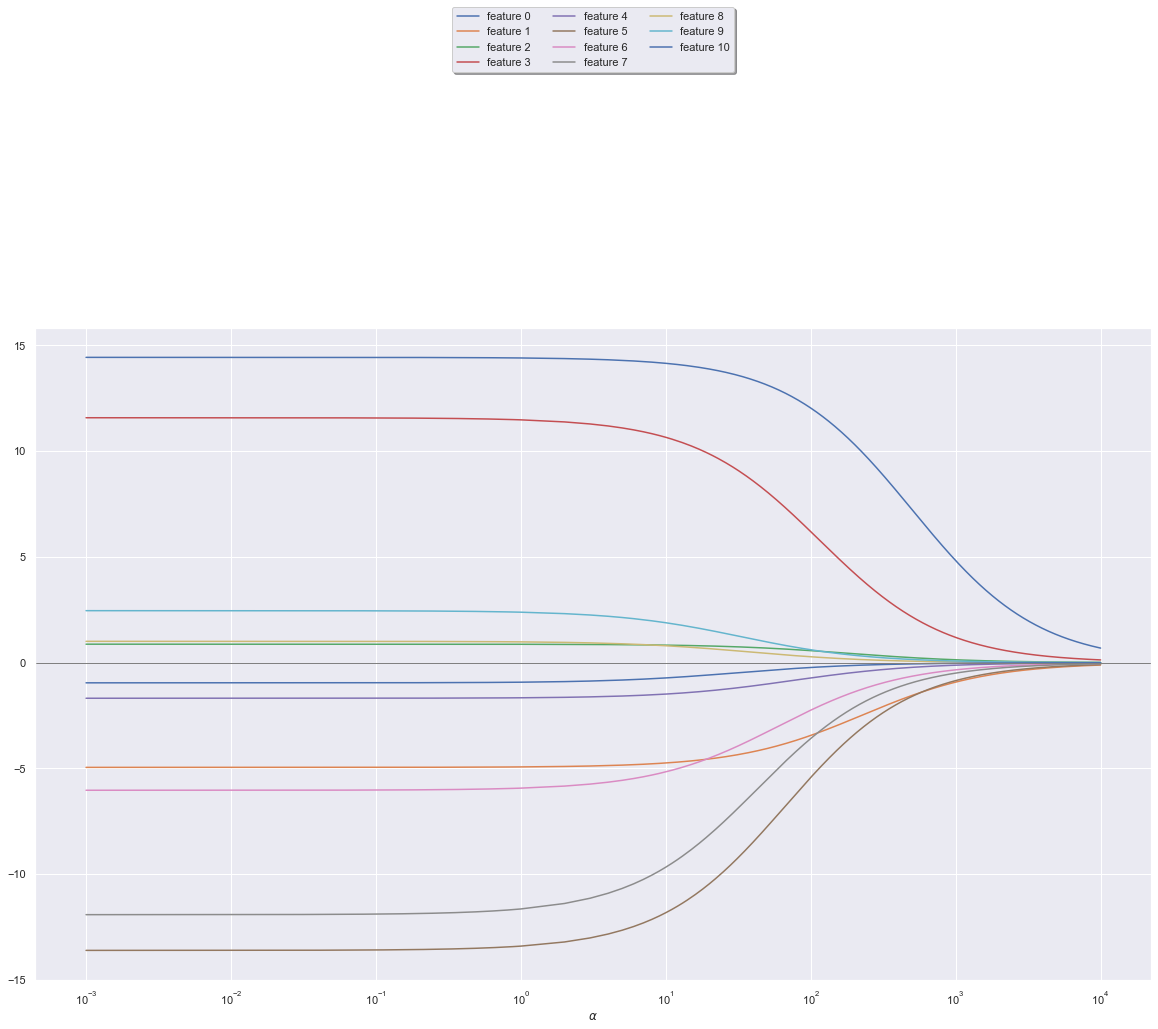

In [129]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,12)})

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,11):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## [4] Lasso Regression

In [130]:
lasso =Lasso(random_state=0)
param_grid_lasso = {
            'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'fit_intercept': [True,False],
            'normalize': [True,False]}
            
grid_lasso_pca = GridSearchCV(estimator =lasso,cv=5, param_grid = param_grid_lasso , return_train_score=True, verbose = 1, n_jobs = -1)
grid_lasso_pca.fit(X_train_reduced, y_train)

best_parameters_lasso_pca=grid_lasso_pca.best_params_
print(best_parameters_lasso_pca)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'alpha': 0.001, 'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.3s finished


In [131]:
y_pred_lasso_pca=grid_lasso_pca.predict(X_test_reduced)

TRS_lasso_pca =round(grid_lasso_pca.score(X_train_reduced, y_train),4)
TS_lasso_pca =round(grid_lasso_pca.score(X_test_reduced, y_test),4)
print('Train score: ',TRS_lasso_pca)
print('Test score: ',TS_lasso_pca)

RMSE_lasso_pca=round(np.sqrt(mean_squared_error(y_test,y_pred_lasso_pca)),4)
print('RMSE: ',RMSE_lasso_pca)

r2_lasso_pca= round(r2_score(y_test,y_pred_lasso_pca),4)
print('r2_score: ',r2_lasso_pca)

r = evaluation.shape[0]
evaluation.loc[r] = ['Pca Lasso regression',best_parameters_lasso_pca,TRS_lasso_pca,TS_lasso_pca,RMSE_lasso_pca,r2_lasso_pca]
evaluation

Train score:  0.7865
Test score:  0.7816
RMSE:  4.4152
r2_score:  0.7816


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.0000,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1.0000,0.8753,3.3368,0.7816


### Feature Importance based on LASSO

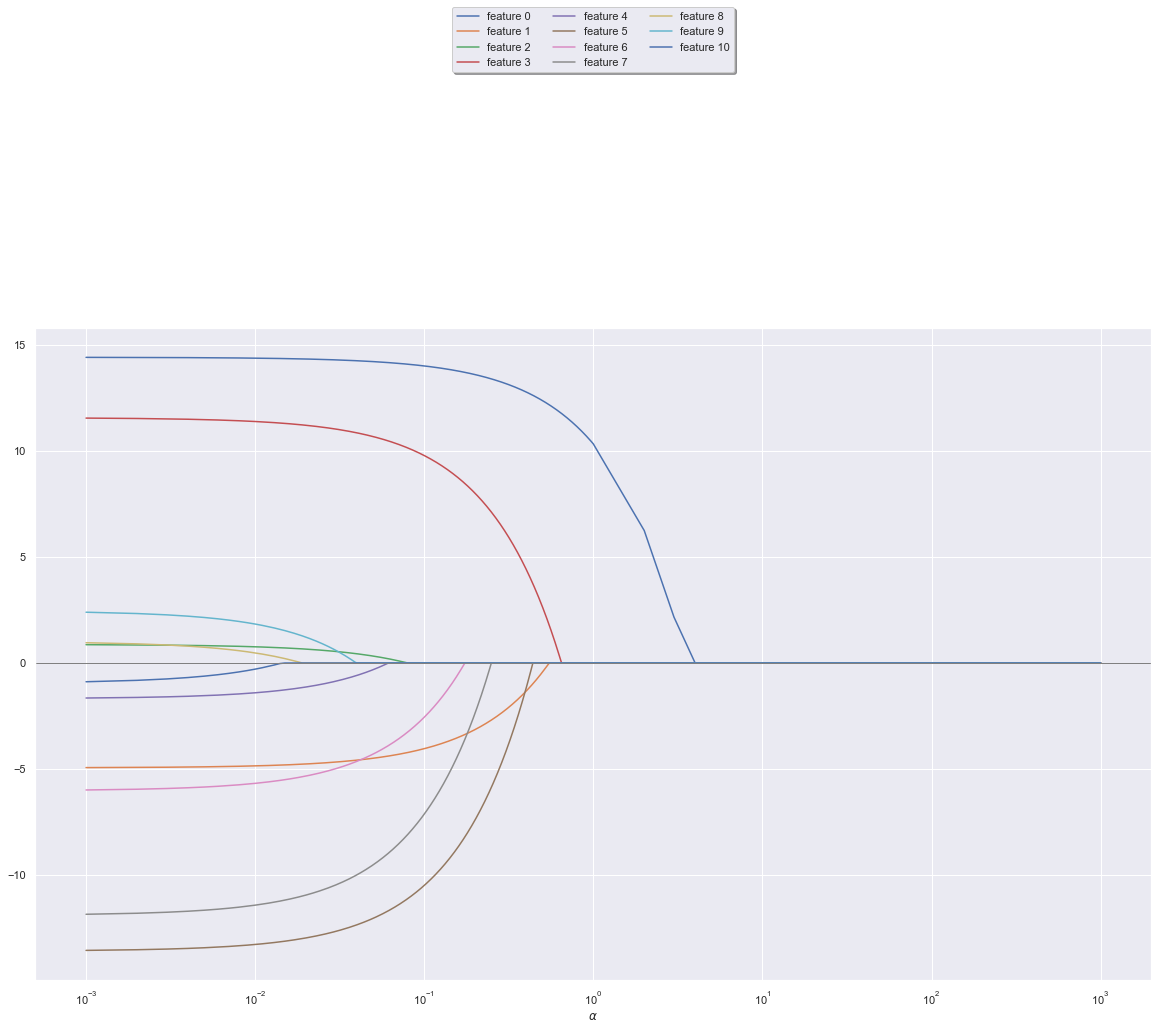

In [132]:
%matplotlib inline
sns.set(rc={'figure.figsize':(20,12)})


x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,11):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## [5] Polynomial Regression

In [133]:
poly = PolynomialFeatures(degree=2)
lreg_poly_pca =LinearRegression()
X_train_reduced_poly =poly.fit_transform(X_train_reduced)
X_test_reduced_poly =poly.fit_transform(X_test_reduced)
lreg_poly_pca.fit(X_train_reduced_poly, y_train)

param_grid_poly = {
            'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]
            }
grid_poly_pca = GridSearchCV(estimator =lreg_poly_pca,cv=5 ,param_grid=param_grid_poly, verbose=1, n_jobs=-1, scoring= None)
grid_poly_pca.fit(X_train_reduced_poly, y_train)

best_parameters_poly_pca=grid_poly_pca.best_params_
print(best_parameters_poly_pca)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'copy_X': True, 'fit_intercept': True, 'normalize': True}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.4s finished


In [134]:
y_pred_poly_pca=grid_poly_pca.predict(X_test_reduced_poly)

TRS_poly_pca =round(grid_poly_pca.score(X_train_reduced_poly, y_train),4)
TS_poly_pca =round(grid_poly_pca.score(X_test_reduced_poly, y_test),4)
print('Train score: ',TRS_poly_pca)
print('Test score: ',TS_poly_pca)

RMSE_poly_pca=round(np.sqrt(mean_squared_error(y_test,y_pred_poly_pca)),4)
print('RMSE: ',RMSE_poly_pca)

r2_poly_pca= round(r2_score(y_test,y_pred_poly_pca),4)
print('R2 score: ',r2_poly_pca)


r = evaluation.shape[0]
evaluation.loc[r] = ['Pca Polynomial regression','degree:2',TRS_poly_pca,TS_poly_pca,RMSE_poly_pca,r2_poly_pca]
evaluation

Train score:  0.8597
Test score:  0.8488
RMSE:  3.6736
R2 score:  0.8488


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.0000,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1.0000,0.8753,3.3368,0.7816


## [6] Decision Tree Regressor

In [135]:
tree=DecisionTreeRegressor(random_state=0)
param_grid_tree = {
            'max_depth' : range(1,10),
            'min_samples_leaf' : range(1,10)
            }

grid_tree_pca = GridSearchCV(estimator =tree, param_grid = param_grid_tree ,cv=5, return_train_score=True, verbose = 1, n_jobs = -1)
grid_tree_pca.fit(X_train_reduced, y_train)

best_parameters_tree_pca=grid_tree_pca.best_params_
print(best_parameters_tree_pca)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'max_depth': 8, 'min_samples_leaf': 3}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    3.0s finished


In [136]:
y_pred_tree_pca =grid_tree_pca.predict(X_test_reduced)

TRS_dt_pca =round(grid_tree_pca.score(X_train_reduced, y_train),4)
TS_dt_pca =round(grid_tree_pca.score(X_test_reduced, y_test),4)
print('Train score: ',TRS_dt_pca)
print('Test score: ',TS_dt_pca)

RMSE_tree_pca=round(np.sqrt(mean_squared_error(y_test,y_pred_tree_pca)),4)
print('RMSE: ',RMSE_tree_pca)

r2_tree_pca=round(r2_score(y_test,y_pred_tree_pca),4)
print('R2 score: ',r2_tree_pca)

r = evaluation.shape[0]
evaluation.loc[r] = ['Pca DecisionTree regression',best_parameters_tree_pca,TRS_dt_pca,TS_dt_pca,RMSE_tree_pca,r2_tree_pca]
evaluation

Train score:  0.9022
Test score:  0.7757
RMSE:  4.4739
R2 score:  0.7757


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.0000,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1.0000,0.8753,3.3368,0.7816


## [7] Linear Support Vector Machine

In [137]:
linear_svm= LinearSVR(random_state=0)
param_grid_linearsvm = {
            'max_iter' : range(1,10),
            }

grid_linearsvm_pca = GridSearchCV(estimator =linear_svm,cv=5, param_grid = param_grid_linearsvm , return_train_score=True, verbose = 1, n_jobs = -1)
grid_linearsvm_pca.fit(X_train_reduced, y_train)

best_parameters_linearsvm_pca=grid_linearsvm_pca.best_params_
print(best_parameters_linearsvm_pca)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'max_iter': 9}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.1s finished


In [138]:
y_pred_LSVM_pca =grid_linearsvm_pca.predict(X_test_reduced)

TRS_LSVM_pca =round(grid_linearsvm_pca.score(X_train_reduced, y_train),4)
TS_LSVM_pca =round(grid_linearsvm_pca.score(X_test_reduced, y_test),4)
print('Train score: ',TRS_LSVM_pca)
print('Test score: ',TS_LSVM_pca)

RMSE_LSVM_pca=round(np.sqrt(mean_squared_error(y_test,y_pred_LSVM_pca)),4)
print('RMSE: ',RMSE_LSVM_pca)

r2_LSVM_pca= round(r2_score(y_test,y_pred_LSVM_pca),4)
print('R2 score: ',r2_LSVM_pca)

r = evaluation.shape[0]
evaluation.loc[r] = ['Pca LSVM regression',best_parameters_linearsvm_pca,TRS_LSVM_pca,TS_LSVM_pca,RMSE_LSVM_pca,r2_LSVM_pca]
evaluation

Train score:  0.7809
Test score:  0.7802
RMSE:  4.4296
R2 score:  0.7802


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.0000,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1.0000,0.8753,3.3368,0.7816


## [8] Kenrelized SVR

In [63]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel':['linear','rbf']}
grid_KSVM_pca = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)
grid_KSVM_pca.fit(X_train_reduced, y_train)

best_parameters_KSVM_pca=grid_KSVM_pca.best_params_
print(best_parameters_KSVM_pca)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [139]:
y_pred_KSVM_pca =grid_KSVM_pca.predict(X_test_reduced)

TRS_KSVM_pca = round(grid_KSVM_pca.score(X_train_reduced, y_train),4)
TS_KSVM_pca= round(grid_KSVM_pca.score(X_test_reduced, y_test),4)

print('Train score: ',TRS_KSVM_pca)
print('Test score: ',TS_KSVM_pca)

RMSE_KSVM_pca= round(np.sqrt(mean_squared_error(y_test,y_pred_KSVM_pca)),4)
print('RMSE: ',RMSE_KSVM_pca)

r2_KSVM_pca= round(r2_score(y_test,y_pred_LSVM_pca),4)
print('R2 score ',r2_KSVM_pca)

r = evaluation.shape[0]
evaluation.loc[r] = ['Pca  kernelized SVM regression',best_parameters_KSVM_pca,TRS_KSVM_pca,TS_KSVM_pca,RMSE_KSVM_pca,r2_KSVM_pca]
evaluation

Train score:  0.9246
Test score:  0.8839
RMSE:  3.2187
R2 score  0.7802


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.0000,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1.0000,0.8753,3.3368,0.7816


## Deep learning models

## Neural Network

In [67]:
# build the model
model_reg = Sequential()

# input layer(no of neuron 10)
model_reg.add(Dense(10, input_dim=17,activation='sigmoid'))

# hidden layer( should not have in first run)

# output layer
model_reg.add(Dense(1))
# compile the model

model_reg.compile(loss ='mse',optimizer ='adam', metrics =['mse','mae'])

# train the model
model_reg.fit(X_train,y_train,epochs =20,batch_size=10)
# evaluate model
model_reg.evaluate(X_test,y_test)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
2056/2056 [==============================] - 1s 286us/sample - loss: 4872.0360 - mean_squared_error: 4872.0366 - mean_absolute_error: 69.1513
Epoch 2/20
2056/2056 [==============================] - 0s 129us/sample - loss: 4635.6623 - mean_squared_error: 4635.6616 - mean_absolute_error: 67.4263
Epoch 3/20
2056/2056 [==============================] - 0s 131us/sample - loss: 4412.3520 - mean_squared_error: 4412.3525 - mean_absolute_error: 65.7476
Epoch 4/20
2056/2056 [==============================] - 0s 123us/sample - loss: 4212.6438 - mean_squared_error: 4212.6431 - mean_absolute_error: 64.2081
Epoch 5/20
2056/2056 [==============================] - 0s 124us/sample - loss: 4017.4879 - mean_squared_error: 4017.4883 - mean_absolute_error: 62.6716
Epoch 6/20
2056/2056 [==============================] - 0s 125us/sample - loss: 3795.1012 - mean_squared_error: 3795.1011 - mean_absolute_error: 60.8686
Epoch 7/20
2056/2056 [============

[937.7844253505439, 937.78436, 29.143642]

In [71]:
y_predict_neural = model_reg.predict(X_test)
r2_score(y_test,y_predict_neural)


RMSE_neural= round(np.sqrt(mean_squared_error(y_test,y_predict_neural)),4)
print('RMSE: ',RMSE_neural)

r2_neural= round(r2_score(y_test,y_predict_neural),4)
print('R2 score ',r2_neural)


RMSE:  30.6233
R2 score  -9.5067


In [140]:


r = evaluation.shape[0]
evaluation.loc[r] = ['Neural network regression','-','-','-',RMSE_neural,r2_neural]
evaluation

,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1,0.8753,3.3368,0.7816


## Base model

## [1] Linear Regression

In [141]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred_linear = lreg.predict(X_test)

TRS_linear = round(lreg.score(X_train, y_train),4)
TS_linear =round(lreg.score(X_test, y_test),4)
print('Train score: {:.4f} '.format(lreg.score(X_train, y_train)))
print('Test score: {:.4f} '.format(lreg.score(X_test, y_test)))

RMSE_Linear= round(np.sqrt(mean_squared_error(y_test,y_pred_linear)),4)
print('RMSE: {:.4f}'.format(RMSE_Linear))

r2_square_Linear = round(r2_score(y_test,y_pred_linear),4)
print('r2_score: {:.4f}'.format(r2_square_Linear))

r = evaluation.shape[0]
evaluation.loc[r] = ['Linear Regression','-',TRS_linear,TS_linear,RMSE_Linear,r2_square_Linear]
evaluation

Train score: 0.8103 
Test score: 0.8081 
RMSE: 4.1390
r2_score: 0.8081


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1,0.8753,3.3368,0.7816


## [2] KNN Regressor

### Applying GridSearch on KNN

In [74]:
knn_reg =KNeighborsRegressor()
param_grid_knn = {
            'n_neighbors' : range(1,20),
            'p': [1,2],
            'weights': ['distance','uniform'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

grid_knn = GridSearchCV(estimator =knn_reg,cv=5, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1)
grid_knn.fit(X_train, y_train)

best_parameters_knn=grid_knn.best_params_
print(best_parameters_knn)

Fitting 5 folds for each of 304 candidates, totalling 1520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.5min


{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 1520 out of 1520 | elapsed:  1.9min finished


## Using the best parameters for KNN Regressor obtained from GridSearch ,calculating RMSE and r2 square score

In [142]:
y_pred_knn=grid_knn.predict(X_test)

TRS_knn =round(grid_knn.score(X_train, y_train),4)
TS_knn=round(grid_knn.score(X_test, y_test),4)
print('Train score: {:.4f} '.format(grid_knn.score(X_train, y_train)))
print('Test score: {:.4f} '.format(grid_knn.score(X_test, y_test)))


RMSE_KNN =round(np.sqrt(mean_squared_error(y_test,y_pred_knn)),4)
print('RMSE: {:.4f}'.format(RMSE_KNN))

r2_square_KNN  = round(r2_score(y_test,y_pred_knn),4)
print('r2_score: {:.4f}'.format(r2_square_KNN))

r = evaluation.shape[0]
evaluation.loc[r] = ['Knn Regression',best_parameters_knn,TRS_knn,TS_knn,RMSE_KNN,r2_square_KNN]
evaluation

Train score: 1.0000 
Test score: 0.9293 
RMSE: 2.5112
r2_score: 0.9293


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1,0.8753,3.3368,0.7816


## [3] Ridge Regression

In [76]:
ridge =Ridge(random_state=0)
param_grid_ridge = {
            'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'fit_intercept': [True,False],
            'normalize': [True,False]}
            
grid_ridge = GridSearchCV(estimator =ridge,cv=5, param_grid = param_grid_ridge , return_train_score=True, verbose = 1, n_jobs = -1)
grid_ridge.fit(X_train, y_train)

best_parameters_ridge=grid_ridge.best_params_
print(best_parameters_ridge)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'alpha': 0.01, 'fit_intercept': True, 'normalize': True}


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.3s finished


## Using the best parameters for Ridge Regressor obtained from GridSearch calculating RMSE and r2 square score

In [143]:
y_pred_ridge=grid_ridge.predict(X_test)

TRS_ridge=round(grid_ridge.score(X_train, y_train),4)
TS_ridge =round(grid_ridge.score(X_test, y_test),4)
print('Train score: {:.4f} '.format(grid_ridge.score(X_train, y_train)))
print('Test score: {:.4f} '.format(grid_ridge.score(X_test, y_test)))

RMSE_Ridge = round(np.sqrt(mean_squared_error(y_test,y_pred_ridge)),4)
print('RMSE: {:.4f}'.format(RMSE_Ridge))

r2_square_Ridge = round(r2_score(y_test,y_pred_ridge),4)
print('r2_score: {:.4f}'.format(r2_square_Ridge))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression',best_parameters_ridge,TRS_ridge,TS_ridge,RMSE_Ridge,r2_square_Ridge]
evaluation

Train score: 0.8102 
Test score: 0.8077 
RMSE: 4.1429
r2_score: 0.8077


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1,0.8753,3.3368,0.7816


## [4] Lasso Regression

### Applying GridSearch on Lasso regression

In [78]:
lasso=Lasso(random_state=0)
param_grid_lasso = {
            'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'fit_intercept': [True,False],
            'normalize': [True,False]}
            
grid_lasso = GridSearchCV(estimator =ridge,cv=5, param_grid = param_grid_lasso , return_train_score=True, verbose = 1, n_jobs = -1)
grid_lasso.fit(X_train, y_train)

best_parameters_lasso=grid_lasso.best_params_
print(best_parameters_lasso)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'alpha': 0.01, 'fit_intercept': True, 'normalize': True}


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.3s finished


### Using the best parameters for Lasso Regressor obtained from GridSearch ,calculating RMSE and r2 square score

In [144]:
y_pred_lasso=grid_lasso.predict(X_test)

TRS_lasso =round(grid_lasso.score(X_train, y_train),4)
TS_lasso =round(grid_lasso.score(X_test, y_test),4)
print('Train score: {:.4f} '.format(grid_lasso.score(X_train, y_train)))
print('Test score: {:.4f} '.format(grid_lasso.score(X_test, y_test)))

RMSE_Lasso =round(np.sqrt(mean_squared_error(y_test,y_pred_lasso)),4)
print('RMSE: {:.4f}'.format(RMSE_Lasso))

r2_square_Lasso = round(r2_score(y_test,y_pred_lasso),4)
print('r2_score: {:.4f}'.format(r2_square_Lasso))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression',best_parameters_lasso,TRS_lasso,TS_lasso,RMSE_Lasso,r2_square_Lasso]
evaluation

Train score: 0.8102 
Test score: 0.8077 
RMSE: 4.1429
r2_score: 0.8077


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1,0.8753,3.3368,0.7816


## [5] Polynomial Regression

## Using the best parameters for Polynomial Regressor obtained from GridSearch ,calculating RMSE and r2 square score

In [145]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg_poly=LinearRegression(copy_X= True,fit_intercept=True,normalize =False)
lreg_poly.fit(X_train_poly, y_train)

y_pred_poly=lreg_poly.predict(X_test_poly)

TRS_poly=round(lreg_poly.score(X_train_poly, y_train),4)
TS_poly= round(lreg_poly.score(X_test_poly, y_test),4)
print('Train score: {:.4f} '.format(lreg_poly.score(X_train_poly, y_train)))
print('Test score: {:.4f} '.format(lreg_poly.score(X_test_poly, y_test)))

RMSE_Polynomial = round(np.sqrt(mean_squared_error(y_test,y_pred_poly)),4)
print('RMSE: {:.4f}'.format(RMSE_Polynomial))

r2_square_Polynomial= round(r2_score(y_test,y_pred_poly),4)
print('R2 score: {:.4f}'.format(r2_square_Polynomial))


r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression','degree'':2',TRS_poly,TS_poly,RMSE_Polynomial,r2_square_Polynomial]
evaluation

Train score: 0.9193 
Test score: 0.8888 
RMSE: 3.1498
R2 score: 0.8888


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1,0.8753,3.3368,0.7816


## [6] Decision Tree Regressor

### Applying Grid Search to Decision Tree Regressor

In [81]:
tree =DecisionTreeRegressor(random_state=0)
param_grid_tree = {
            'max_depth' : range(1,10),
            'min_samples_leaf' : range(1,10)
            }

grid_tree = GridSearchCV(estimator =tree, cv=5,param_grid = param_grid_tree , return_train_score=True, verbose = 1, n_jobs = -1)
grid_tree.fit(X_train, y_train)

best_parameters_tree=grid_tree.best_params_
print(best_parameters_tree)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'max_depth': 9, 'min_samples_leaf': 6}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    2.8s finished


### Using best parameters obtained from GridSearch for Decision Tree Regressor

In [146]:

y_pred_tree=grid_tree.predict(X_test)
TRS_tree= round(grid_tree.score(X_train, y_train),4)
TS_tree =round(grid_tree.score(X_test, y_test),4)
print('Train score: {:.4f} '.format(grid_tree.score(X_train, y_train)))
print('Test score: {:.4f} '.format(grid_tree.score(X_test, y_test)))

RMSE_DecisionTree = round(np.sqrt(mean_squared_error(y_test,y_pred_tree)),4)
print('RMSE: {:.4f}'.format(RMSE_DecisionTree))

r2_square_DecisionTree =round(r2_score(y_test,y_pred_tree),4)
print('R2 score {:.4f}'.format(r2_square_DecisionTree))

r = evaluation.shape[0]
evaluation.loc[r] = ['Decision tree Regression',best_parameters_tree,TRS_tree,TS_tree,RMSE_DecisionTree,r2_square_DecisionTree]
evaluation

Train score: 0.9725 
Test score: 0.9167 
RMSE: 2.7272
R2 score 0.9167


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1,0.8753,3.3368,0.7816


## [7] Linear Support Vector Machine

### Applying Grid Search to Linear SVM 

In [83]:
linear_svm=LinearSVR(random_state=0)
param_grid_linearsvm = {
            'max_iter' : range(1,10)
            }

grid_LSVR = GridSearchCV(estimator =linear_svm, param_grid = param_grid_linearsvm , return_train_score=True, verbose = 1, n_jobs = -1)
grid_LSVR.fit(X_train, y_train)

best_parameters_linearsvm=grid_LSVR.best_params_
print(best_parameters_linearsvm)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


{'max_iter': 5}


### Using best parameters obtained from GridSearch for Linear SVM

In [147]:
y_pred_svm=grid_LSVR.predict(X_test)

TRS_LSVM =round(grid_LSVR.score(X_train, y_train),4)
TS_LSVM =round(grid_LSVR.score(X_test, y_test),4)
print('Train score: {:.4f} '.format(grid_LSVR.score(X_train, y_train)))
print('Test score: {:.4f} '.format(grid_LSVR.score(X_test, y_test)))

RMSE_LinearSVM = round(np.sqrt(mean_squared_error(y_test,y_pred_svm)),4)
print('RMSE: {:.4f}'.format(RMSE_LinearSVM))

r2_square_LinearSVM = round(r2_score(y_test,y_pred_svm),4)
print('r2_score: {:.4f}'.format(r2_square_LinearSVM))

r = evaluation.shape[0]
evaluation.loc[r] = ['Linear SVM Regression',best_parameters_linearsvm,TRS_LSVM,TS_LSVM,RMSE_LinearSVM,r2_square_LinearSVM]
evaluation

Train score: 0.7829 
Test score: 0.7776 
RMSE: 4.4555
r2_score: 0.7776


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1,0.8753,3.3368,0.7816


# [8] Kenrelized SVR

### Applying Grid Search to Kernelized SVR

In [85]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel':['linear','rbf']}
grid_KSVR = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)
grid_KSVR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [148]:
best_parameters_KSVM =grid_KSVR.best_params_
y_pred_kernelizedsvr=grid_KSVR.predict(X_test)

TRS_KSVM =round(grid_KSVR.score(X_train, y_train),4)
TS_KSVM =round(grid_KSVR.score(X_test, y_test),4)
print('Train score: {:.4f} '.format(grid_KSVR.score(X_train, y_train)))
print('Test score: {:.4f} '.format(grid_KSVR.score(X_test, y_test)))

RMSE_kernelizedSVM = round(np.sqrt(mean_squared_error(y_test,y_pred_kernelizedsvr)),4)
print('RMSE: {:.4f}'.format(np.sqrt(RMSE_kernelizedSVM)))

r2_square_kernelizedSVM = round(r2_score(y_test,y_pred_kernelizedsvr),4)
print('r2_score: {:.4f}'.format(r2_square_kernelizedSVM))

r = evaluation.shape[0]
evaluation.loc[r] = ['kernelized SVM Regression',best_parameters_KSVM,TRS_KSVM,TS_KSVM,RMSE_kernelizedSVM,r2_square_kernelizedSVM]
evaluation

Train score: 0.9622 
Test score: 0.9164 
RMSE: 1.6528
r2_score: 0.9164


,Model,Best parameters,Train score,Test score,Root Mean Squared Error (RMSE),R-squared
0,Bagging DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9627,0.9423,2.2689,0.9423
1,Pasting DecisionTree Regression,"{'max_features': 9, 'max_samples': 1000, 'n_es...",0.9693,0.9455,2.2057,0.9455
2,Bagging Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9205,0.9073,2.8764,0.9073
3,Pasting Kernelized SVR,"{'max_features': 10, 'max_samples': 1000, 'n_e...",0.9211,0.9074,2.8750,0.9074
4,AdaBossting DecisionTre regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9916,0.9573,1.9512,0.9573
5,AdaBossting KSVM regression,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.9702,0.9047,2.9167,0.9047
6,GradientBoosting regression,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1,0.9606,1.8741,0.9606
7,RanomForest regression,"{'max_depth': 9, 'n_estimators': 1000}",0.9864,0.9511,2.0888,0.9511
8,Pca Linear regression,-,0.7866,0.7816,4.4149,0.7816
9,Pca Knn regression,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1...",1,0.8753,3.3368,0.7816


In [23]:
evaluation.to_csv("result.csv")

## Regression Result

## [1] Best Regression Model:

## GradientBoosting regression

## R2 score = 0.9606

In our case we have the following results for r2 Squared Score from the regression models:-

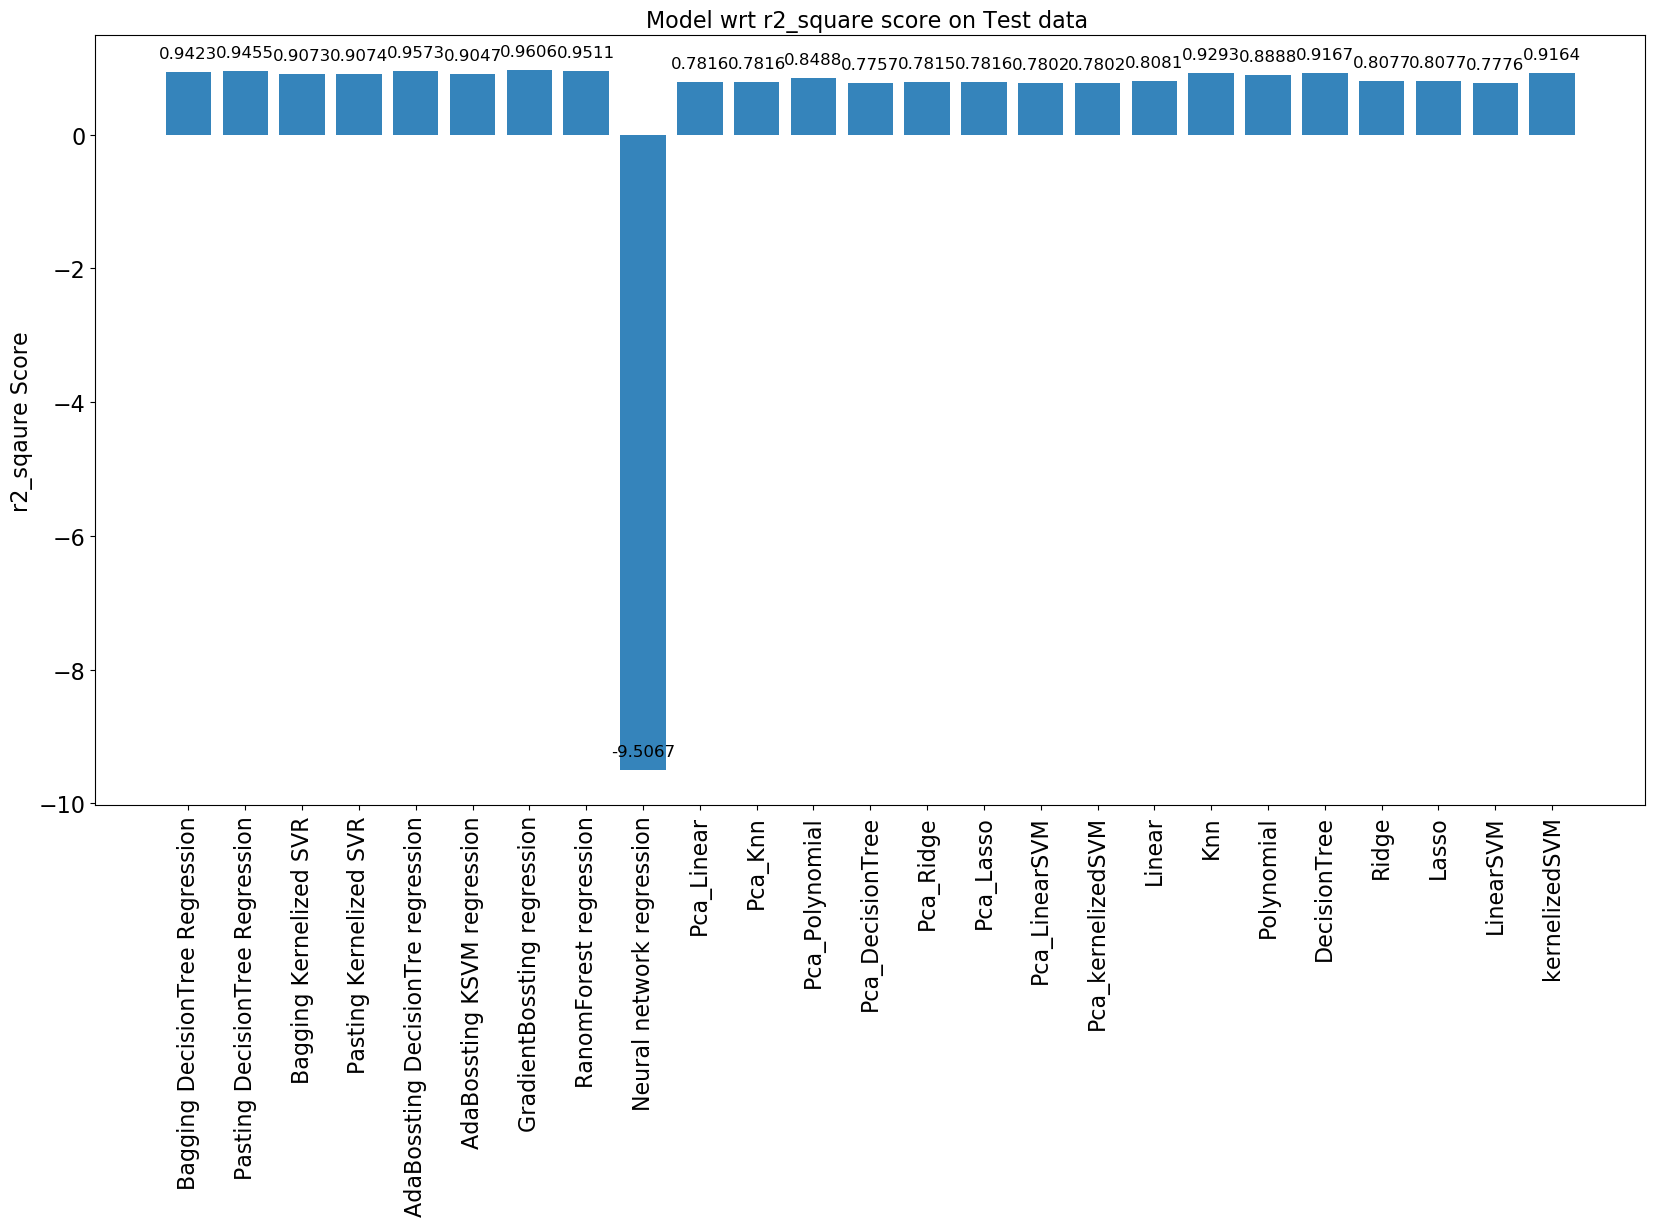

In [91]:
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.figure(figsize=(20,10))

objects = ('Bagging DecisionTree Regression','Pasting DecisionTree Regression','Bagging Kernelized SVR','Pasting Kernelized SVR',
           'AdaBossting DecisionTre regression','AdaBossting KSVM regression','GradientBossting regression','RanomForest regression',
           'Neural network regression',
           'Pca_Linear', 'Pca_Knn','Pca_Polynomial','Pca_DecisionTree','Pca_Ridge','Pca_Lasso',
           'Pca_LinearSVM','Pca_kernelizedSVM','Linear', 'Knn','Polynomial','DecisionTree','Ridge','Lasso','LinearSVM','kernelizedSVM')
y_pos = np.arange(len(objects))

performance = [r2_dt_bag,r2_dt_pas,r2_KSVM_bag,r2_KSVM_pas,
               r2_dt_ada,r2_KSVM_ada,r2_GB,r2_rf,r2_neural,
               r2_Linear_pca,r2_Knn_pca,r2_poly_pca,r2_tree_pca,r2_ridge_pca,r2_lasso_pca,
               r2_LSVM_pca,r2_KSVM_pca,r2_square_Linear,r2_square_KNN,r2_square_Polynomial,r2_square_DecisionTree,
               r2_square_Ridge,r2_square_Lasso,r2_square_LinearSVM,r2_square_kernelizedSVM]


plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects,rotation=90,size=16)
plt.yticks(size=16)
plt.ylabel('r2_sqaure Score',size=16)
plt.title('Model wrt r2_square score on Test data ',size=16)
#plt.text
for x,y in zip(y_pos,performance):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',size=12)
  
plt.show()

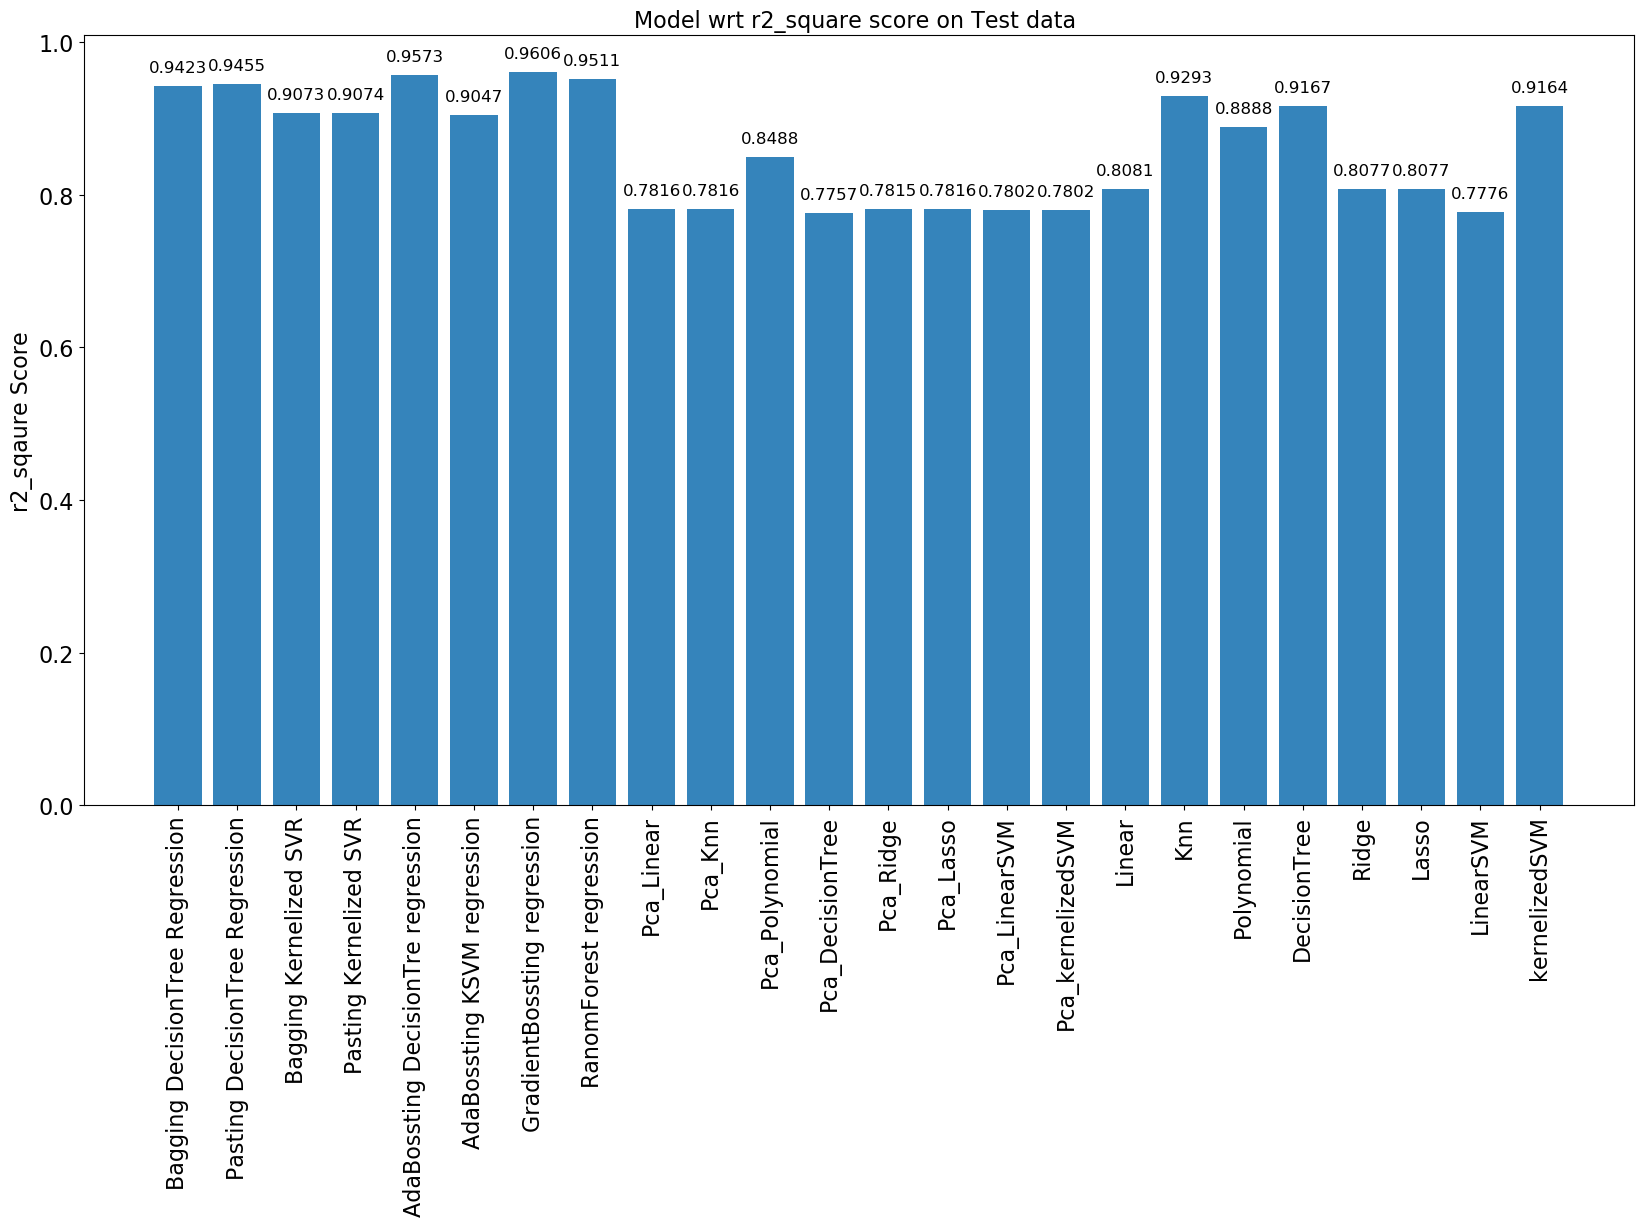

In [113]:
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.figure(figsize=(20,10))

objects = ('Bagging DecisionTree Regression','Pasting DecisionTree Regression','Bagging Kernelized SVR','Pasting Kernelized SVR',
           'AdaBossting DecisionTre regression','AdaBossting KSVM regression','GradientBossting regression','RanomForest regression',
           'Pca_Linear', 'Pca_Knn','Pca_Polynomial','Pca_DecisionTree','Pca_Ridge','Pca_Lasso',
           'Pca_LinearSVM','Pca_kernelizedSVM','Linear', 'Knn','Polynomial','DecisionTree','Ridge','Lasso','LinearSVM','kernelizedSVM')
y_pos = np.arange(len(objects))

performance = [r2_dt_bag,r2_dt_pas,r2_KSVM_bag,r2_KSVM_pas,
               r2_dt_ada,r2_KSVM_ada,r2_GB,r2_rf,
               r2_Linear_pca,r2_Knn_pca,r2_poly_pca,r2_tree_pca,r2_ridge_pca,r2_lasso_pca,
               r2_LSVM_pca,r2_KSVM_pca,r2_square_Linear,r2_square_KNN,r2_square_Polynomial,r2_square_DecisionTree,
               r2_square_Ridge,r2_square_Lasso,r2_square_LinearSVM,r2_square_kernelizedSVM]


plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects,rotation=90,size=16)
plt.yticks(size=16)
plt.ylabel('r2_sqaure Score',size=16)
plt.title('Model wrt r2_square score on Test data ',size=16)
#plt.text
for x,y in zip(y_pos,performance):

    label = "{:.4f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',size=12)
  
plt.show()

### [3] Comaprision Of PCA with previous Base Model through Bar Plot

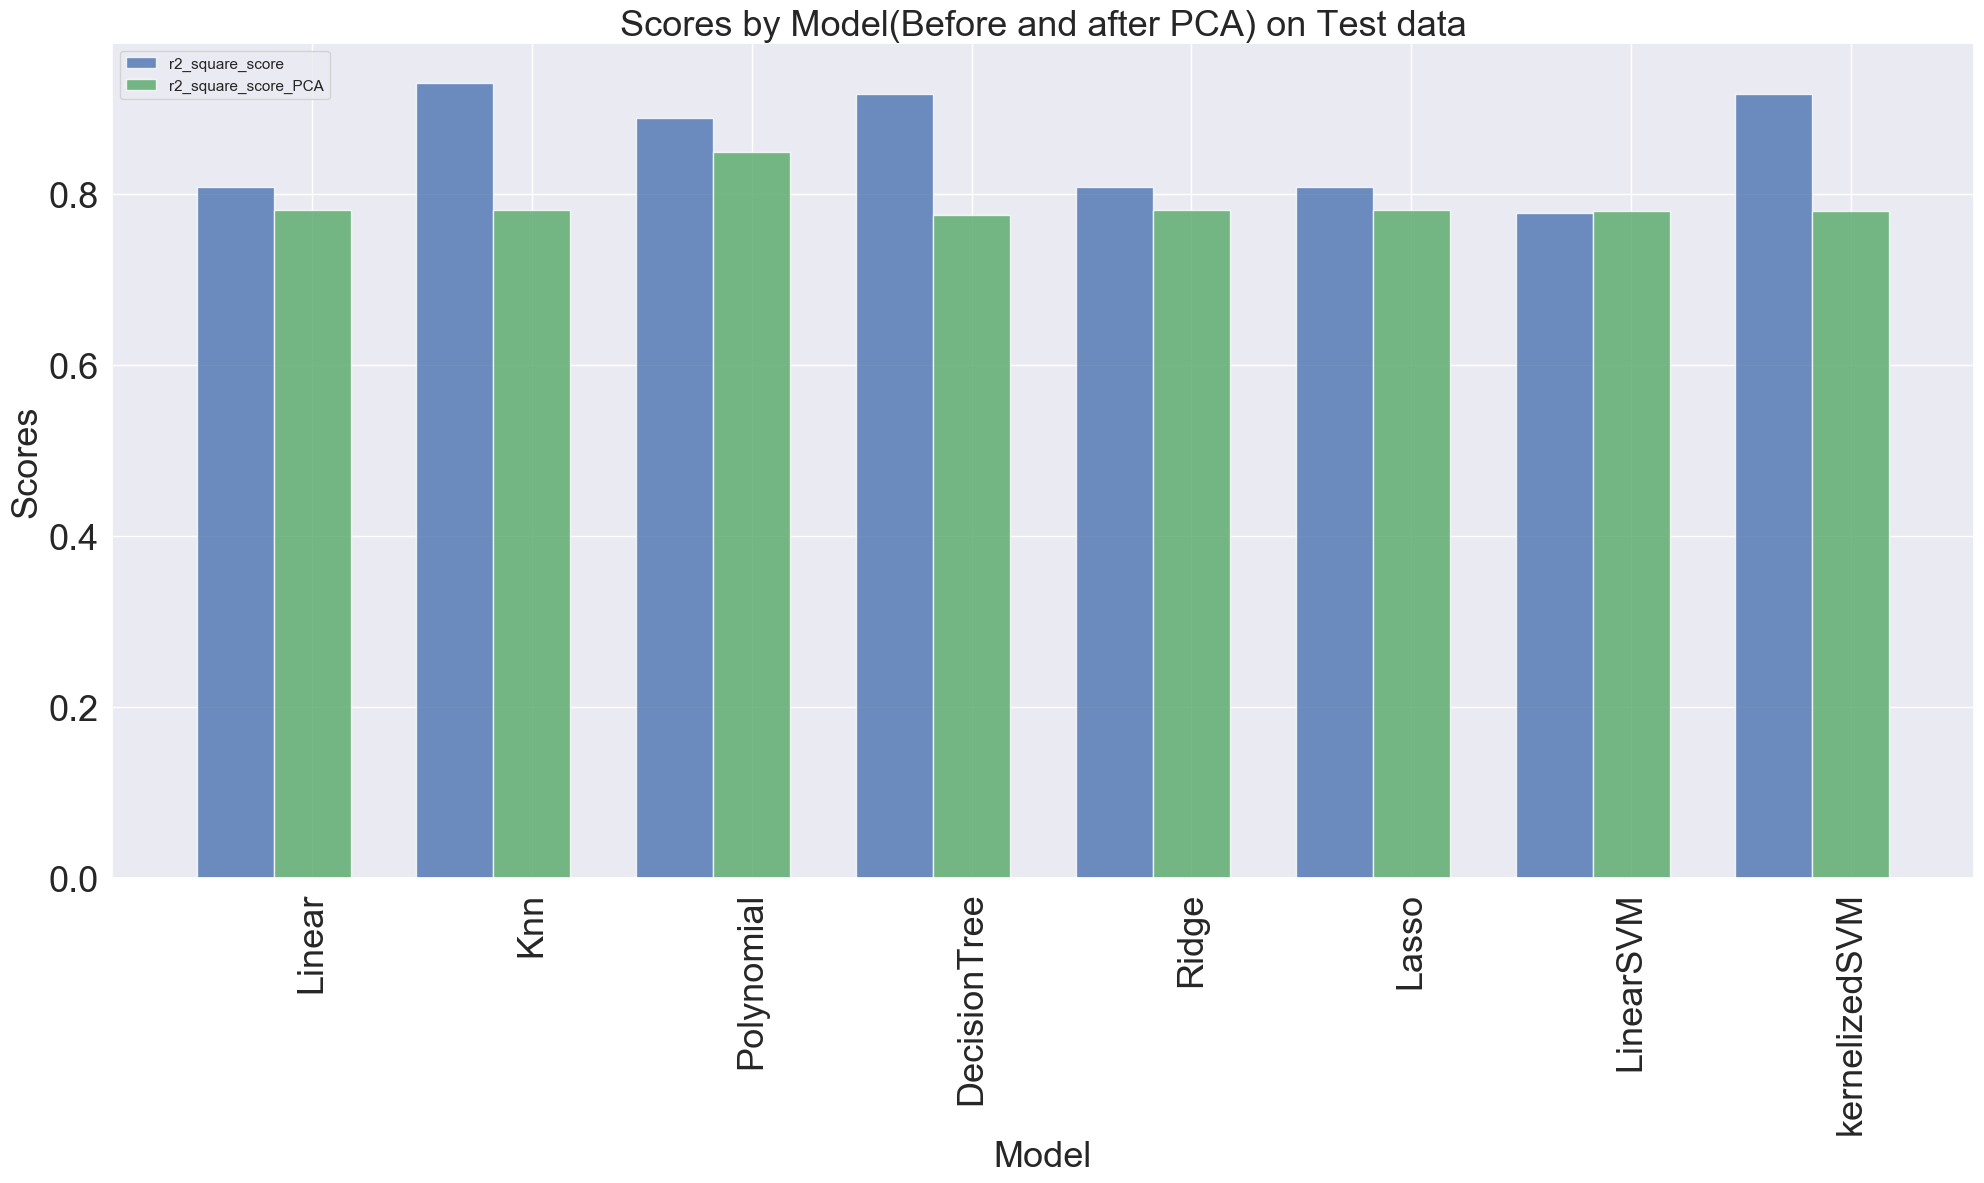

In [114]:
import numpy as np
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,12)})
# data to plot
n_groups = 8
r2square_score = [r2_square_Linear,r2_square_KNN,r2_square_Polynomial,r2_square_DecisionTree,r2_square_Ridge,r2_square_Lasso,r2_square_LinearSVM,r2_square_kernelizedSVM]
r2_square_score_PCA = [r2_Linear_pca,r2_Knn_pca,r2_poly_pca,r2_tree_pca,r2_ridge_pca,r2_lasso_pca,r2_LSVM_pca,r2_KSVM_pca]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, r2square_score, bar_width,
alpha=opacity,
color='b',
label='r2_square_score')

rects2 = plt.bar(index + bar_width, r2_square_score_PCA, bar_width,
alpha=opacity,
color='g',
label='r2_square_score_PCA')

plt.xlabel('Model',size=26)
plt.ylabel('Scores',size=26)
plt.title('Scores by Model(Before and after PCA) on Test data',size =26)
plt.xticks(index + bar_width, ('Linear', 'Knn','Polynomial','DecisionTree','Ridge','Lasso','LinearSVM','kernelizedSVM'),size=26,rotation=90)
plt.yticks(size=26)
plt.legend()

plt.tight_layout()
plt.show()

It shows that after applying PCA (0.95), reducing feature from (2938,22) to (2938, 11) R2 score has reduced. 
It shows that all the features are important in dataset and contain meaningful information 
